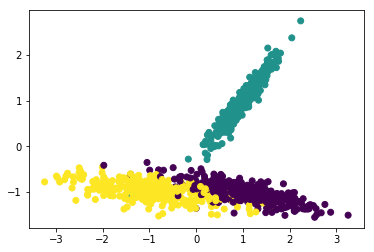

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_classification

# X为样本特征，Y为样本类别输出，共1000个样本，每个样本2个特征，输出有3个类别，没有冗余特征，每个类别一个簇
X, Y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                             n_clusters_per_class=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y)
plt.show()

In [5]:
print(X)

[[-1.88195855 -0.90746578]
 [-0.85632971 -1.03447302]
 [-0.17639312 -1.22340631]
 ...
 [ 0.94427389  1.03273146]
 [ 0.88566104 -1.17238619]
 [ 0.81026766  0.92200103]]


In [6]:
print(Y)

[2 2 2 2 0 1 2 2 2 2 0 2 1 1 1 0 2 0 0 0 2 0 1 2 0 2 1 1 0 2 0 2 0 1 1 0 0
 1 1 0 2 1 2 0 2 2 2 0 0 1 0 1 2 2 0 2 2 0 1 2 1 0 1 2 2 1 1 2 1 0 0 2 1 1
 1 2 0 2 0 2 2 2 2 1 2 1 2 0 0 2 0 0 0 1 1 2 0 0 0 2 1 0 1 2 1 1 1 0 1 1 0
 2 1 1 1 1 2 1 2 0 0 0 0 0 0 0 0 2 2 1 1 0 0 0 0 0 2 1 0 1 1 2 2 2 1 0 1 1
 2 0 0 1 1 1 1 2 2 0 1 2 1 1 1 0 1 0 1 0 1 0 2 0 0 2 1 2 1 1 0 1 1 1 2 0 1
 0 2 1 1 2 2 1 0 0 2 0 0 1 2 1 2 1 2 0 2 2 1 1 2 2 0 0 0 2 0 2 0 0 2 0 2 0
 2 2 1 2 2 0 2 0 0 0 0 2 0 2 2 1 1 0 2 1 0 0 2 2 2 1 0 2 1 1 1 2 2 0 1 2 0
 1 1 0 1 2 0 1 0 2 1 1 0 0 2 0 2 2 0 2 2 0 2 1 1 0 0 2 1 2 0 2 1 1 2 2 0 2
 2 0 2 1 0 1 2 0 2 0 2 2 1 0 2 2 0 0 1 1 0 0 0 1 0 1 0 2 0 0 0 2 2 1 2 0 1
 1 2 0 2 2 0 0 1 0 2 2 0 0 0 0 1 1 2 2 1 2 0 0 1 2 2 2 1 0 2 1 1 0 1 2 1 1
 0 0 0 1 0 1 1 2 1 2 2 1 1 1 0 1 0 2 0 1 2 1 2 2 0 2 0 0 1 0 2 0 0 2 1 1 1
 0 0 0 1 1 2 2 0 1 1 2 2 1 2 1 0 1 2 2 2 0 1 2 0 1 1 1 1 2 1 1 0 1 1 1 1 1
 2 1 2 0 0 0 2 0 1 0 2 0 2 0 2 1 0 2 1 1 1 1 1 0 1 2 0 2 2 2 2 2 2 1 1 2 1
 1 2 2 2 1 2 0 0 0 2 2 0 

In [7]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors = 15 , weights='distance')
clf.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

Text(0.5,1,"3-Class classification (k = 15, weights = 'distance')")

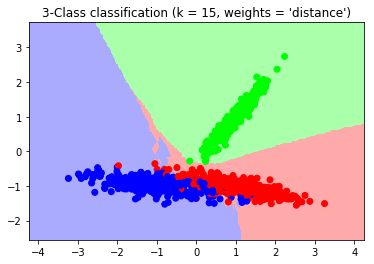

In [8]:
# 可视化预测的效果

from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#确认训练集的边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#生成随机数据来做测试集，然后作预测
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# 画出测试集数据
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# 也画出所有的训练集数据
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = 15, weights = 'distance')" )